Nome: Arilson Bolivar Ferreira | Matrícula: 2021100481

**DECOMPOSIÇÃO POR VALORES SINGULARES**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from numpy.linalg import svd
from PIL import Image

def compress_image(img_name, img, k):
    print("processing...")

    # Dividir o array da imagem em três arrays 2d
    r = img[:, :, 0]  # array for R
    g = img[:, :, 1]  # array for G
    b = img[:, :, 2]  # array for B

    print("compressing...")

    # Aplica a decomposição da matriz por valores singulares
    ur, sr, vr = svd(r, full_matrices=False)
    ug, sg, vg = svd(g, full_matrices=False)
    ub, sb, vb = svd(b, full_matrices=False)

    print('dimensões do canal r: {}'.format(r.shape))

    rr = np.dot(ur[:, :k], np.dot(np.diag(sr[:k]), vr[:k, :]))
    rg = np.dot(ug[:, :k], np.dot(np.diag(sg[:k]), vg[:k, :]))
    rb = np.dot(ub[:, :k], np.dot(np.diag(sb[:k]), vb[:k, :]))

    print("arranging...")

    rimg = np.zeros(img.shape)

    rimg[:, :, 0] = rr
    rimg[:, :, 1] = rg
    rimg[:, :, 2] = rb

    for ind1, row in enumerate(rimg):
        for ind2, col in enumerate(row):
            for ind3, value in enumerate(col):
                if value < 0:
                    rimg[ind1, ind2, ind3] = abs(value)
                if value > 255:
                    rimg[ind1, ind2, ind3] = 255

    compressed_image = rimg.astype(np.uint8)

    plt.title("Image Name - figura compactada: " + img_name + "\n")
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.show()
    cv2.imwrite("Imagem/comp-" + str(img_name) + ".jpg", compressed_image)

**Manipular Imagens**

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from skimage import io
from google.colab.patches import cv2_imshow

origem = "https://th.bing.com/th/id/OIP.HPjAHX1h8yzStzYPci-nfAHaHa?pid=ImgDet&rs=1"
image = io.imread(origem) 
img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

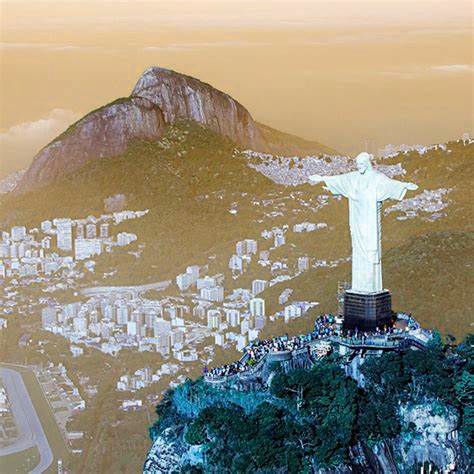

In [ ]:
cv2_imshow(image)

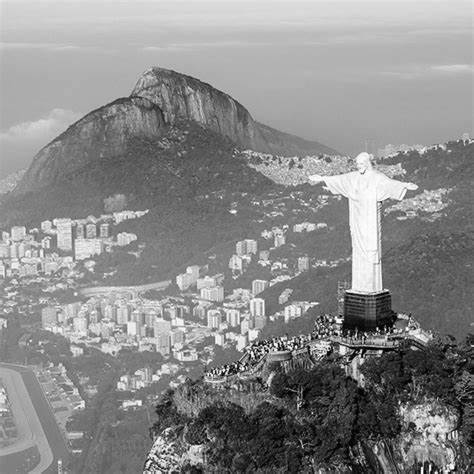

In [ ]:
cv2_imshow(img)

In [ ]:
image.shape

(474, 474, 3)

**SVD 60%**

In [ ]:
k = np.ceil(0.6*474)
print(k)

285.0


processing...
compressing...
dimensões do canal r: (474, 474)
arranging...


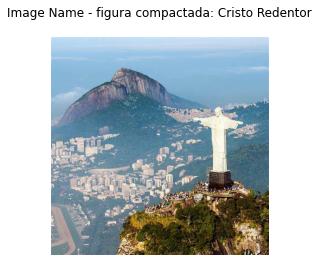

In [ ]:
k = 285
compress_image("Cristo Redentor", image, k)

**SVD 70%**

In [ ]:
k = np.ceil(0.7*474)
print(k)

332.0


processing...
compressing...
dimensões do canal r: (474, 474)
arranging...


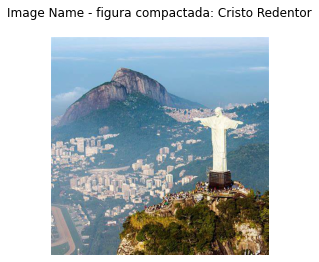

In [ ]:
k = 332
compress_image("Cristo Redentor", image, k)

**SVD 80%**

In [ ]:
k = np.ceil(0.8*474)
print(k)

380.0


processing...
compressing...
dimensões do canal r: (474, 474)
arranging...


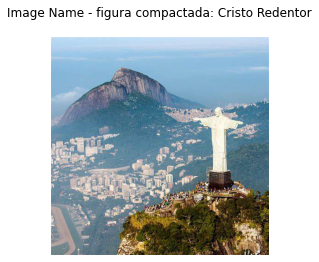

In [ ]:
k = 380
compress_image("Cristo Redentor", image, k)